# Exam 1 Fall 2023 (100 pts total)

files needed = ('phil.csv', 'tax.csv', 'imports.xlsx', 'data.xlsx'), which can be found in `exam1_data.zip`

You have 75 minutes to complete this exam.

Answer all the questions below in this notebook. You should insert as many cells into the notebook as you need. When you are finished, upload your finished notebook to Canvas. 

* You may use your notes and the Internet.  
* You **cannot** work with others on the exam. You cannot post questions online and solicit answers, e.g., through Chegg or chat GPT.
* Import any packages you need to complete this exam.
* Do not modify the data files directly. All data manipulation should happen in your code.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

## Question 0 (5 points): Last, First
 
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

## Question 1 (30 points): Plotting


The file 'phil.csv' contains annual data on the average unemployment rate (`UNRATE`) and the CPI inflation rate (`INFL`). These are components of the Phillips Curve. 

1. Create a histogram of the unemployment rate data.
2. The histogram's color should be 'silver'.
3. The histogram should have 15 bins.
4. The figure size should be 8 inches wide and 5 inches tall. 
5. The tick labels on the y-axis should be integers&mdash;there should be not digits to the right of the decimal point.

Make any further adjustments you find necessary. 

In [21]:
phil = pd.read_csv('phil.csv', index_col='DATE')
print(phil.head(1), '\n')
print(phil.dtypes)

      UNRATE      INFL
DATE                  
1948    3.75  1.713333 

UNRATE    float64
INFL      float64
dtype: object


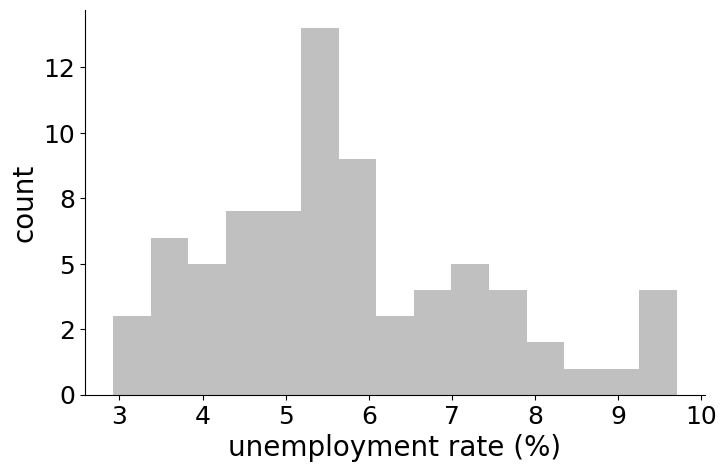

In [22]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(phil['UNRATE'], bins=15, color='silver')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', labelsize=18)
ax.set_ylabel('count', fontsize=20)
ax.set_xlabel('unemployment rate (%)', fontsize=20)

from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.show()

## Question 2 (5 points): Subsets of DataFrames

1. Create a dataframe from the file "tax.csv".
2. How many entries were built in 2022? The variable `YearBuilt` hold the build date. Print it as:
```
There are ??? buildings built in 2022.
```
Replace the ??? with your answer. 

In [44]:
tax = pd.read_csv('tax.csv')
num2022 = tax[tax['YearBuilt']==2022].shape[0]
print('There are {} buildings built in 2022.'.format(num2022) )

There are 319 buiding built in 2022.


## Question 3 (20 points): Working with DataFrames 

The file 'imports.xlsx' contains two variables. `imports china` is the value of US imports from China from 1985&ndash;2022 and `imports all` is the value of total US imports from 1985&ndash;2022.

Use the data to answer the following questions.

1. Compute the share of Chinese imports in total imports, i.e., imports china / imports all * 100
2. The China-US trade war intensified in 2018. Print out China's share of US imports as follows:

```
China's share in US trade was ?? percent in 2018 and ?? percent in 2022.
```

Replace the ??s with your answers. The two numbers should be expressed as integers.

In [23]:
imports = pd.read_excel('imports.xlsx', index_col='observation_date')
imports.head(2)

imports china  imports all
observation_date                            
1985                     3861.7          NaN
1986                     4771.0          NaN

In [89]:
# Part 1
imports['china share'] = imports['imports china']/imports['imports all']*100

# Part 2
answer = 'China\'s share in US trade was {:.0f} percent in 2018 and {:.0f} percent in 2022.'
print(answer.format(imports.loc[2018, 'china share'],imports.loc[2022, 'china share'] ) )

China's share in US trade was 21 percent in 2018 and 16 percent in 2022.


## Question 4 (5 points): Working with indexes

1. Load the file 'data.xlsx' into a DataFrame. Name the DataFrame `df1`.
2. Create a DataFrame named `df2` that has only the columns `v2`, `v12`, `v15`, and `v22`. 
3. Set the index of `df1` to be column `v15`.
4. Print out the first 3 rows of `df2`.


In [78]:
df1 = pd.read_excel('data.xlsx')
df2 = df1[['v2', 'v12', 'v15', 'v22']]
df2.set_index('v15', inplace=True)
df2.head(3)

v2       v12       v22
v15                                   
0.881760  0.088314  0.256441  0.702173
0.036894  0.184034  0.735664  0.591244
0.725282  0.333076  0.841822  0.763257

## Question 5 (20 points): Dictionaries and functions

Write a function (call it q5) that takes a `dict` as an argument. The `dict` holds the the quantity of lumber and species of the lumber. The function computes and returns the total value of the lumber in the `dict`, that is, the quantity times the price. Oak sells for \\$2.50 each and cherry sells for \\$6.25 each.  

Test your function by running the following code (copy and past it into a code cell):

```python
tree1 = {'quantity':10, 'species':'oak'}
tree2 = {'quantity':25, 'species':'cherry'}
print(q5(tree1))
print(q5(tree2))
```
      

In [5]:
def q5(tree):
    if tree['species'] == 'oak':
        return tree['quantity'] * 2.50
    if tree['species'] == 'cherry':
        return tree['quantity'] * 6.25

tree1 = {'quantity':10, 'species':'oak'}
tree2 = {'quantity':25, 'species':'cherry'}
print(q5(tree1))
print(q5(tree2))


25.0
156.25


## Question 6 (5 points): Dataframes

Consider the code below when answering the following questions.  

```python
df = pd.DataFrame({'a':range(0,10), 'b':range(5,15), 'c':range(-2,17, 2)})

for i in range(0, 10):
    df.loc[i, 'd'] = (df.loc[i, 'a'] + df.loc[i, 'b'] + df.loc[i, 'c'])/3
    
print(df)
```

You do not need to write any code to answer these question. Insert a markdown cell and type your answer out.

1. What does this code do?
2. Why is this code a poor way to accomplish this task? 

1. This code computes the average of `a`, `b`, and `c` for each row and stores it in a column named `d`.
2. We should not loop over the rows of a DataFrame. The `.mean()` method of pandas is more efficient. 

## Question 7 (10 points):

2. Write code that removes the vowels (a, e, i, o, u) from the following string. Print out the "devoweled" string. 

```python
ozy = 'Look on my works, ye Mighty, and despair!'
```

In [88]:
ozy = 'Look on my works, ye Mighty, and despair!'

devoweled = ''
for i in ozy:
    if i not in ['a', 'e', 'i', 'o', 'u']:
        devoweled = devoweled +  i

devoweled

'Lk n my wrks, y Mghty, nd dspr!'

### You are finished!
Upload your completed notebook to Canvas.